### import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [2]:
# Read data
data = pd.read_csv('Datasets/tennis.csv')

In [4]:
# data info check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [9]:
print(data.columns)
X= data[['outlook', 'temp', 'humidity', 'windy']]
print(X.head())
y= data[['play']]
print(y.head())

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')
    outlook  temp humidity  windy
0     sunny   hot     high  False
1     sunny   hot     high   True
2  overcast   hot     high  False
3     rainy  mild     high  False
4     rainy  cool   normal  False
  play
0   no
1   no
2  yes
3  yes
4  yes


In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)
print("-------- x_train-------")
print( X_train.head(2))
print("-------- x_test-------")
print( X_test.head(2))
print("-------- y_train-------")
print( y_train.head(2))
print("-------- y_test-------")
print( y_test.head(2))


-------- x_train-------
    outlook  temp humidity  windy
8     sunny  cool   normal  False
2  overcast   hot     high  False
-------- x_test-------
     outlook  temp humidity  windy
9      rainy  mild   normal  False
11  overcast  mild     high   True
-------- y_train-------
  play
8  yes
2  yes
-------- y_test-------
   play
9   yes
11  yes


In [24]:
# Hnadling Categorical Varaibles
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train).toarray()
print(X_train_ohe)
X_test_ohe = ohe.fit_transform(X_test).toarray()
print(X_test_ohe)

[[0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]]
[[0. 1. 0. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]]


In [27]:
# create dataframe of onehot encoding
ohe_df= pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(X_train.columns))
print(ohe_df.head(2))

   outlook_overcast  outlook_rainy  outlook_sunny  temp_cool  temp_hot  \
0               0.0            0.0            1.0        1.0       0.0   
1               1.0            0.0            0.0        0.0       1.0   

   temp_mild  humidity_high  humidity_normal  windy_False  windy_True  
0        0.0            0.0              1.0          1.0         0.0  
1        0.0            1.0              0.0          1.0         0.0  


In [28]:
# Create ML model
clf= DecisionTreeClassifier(criterion="entropy")
# fit model
clf.fit(X_train_ohe, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
# Generate Prediction
y_pred= clf.predict(X_train_ohe)
print(y_pred)

['yes' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes']


In [30]:
accuracy= accuracy_score(y_train, y_pred)
print(accuracy)

1.0


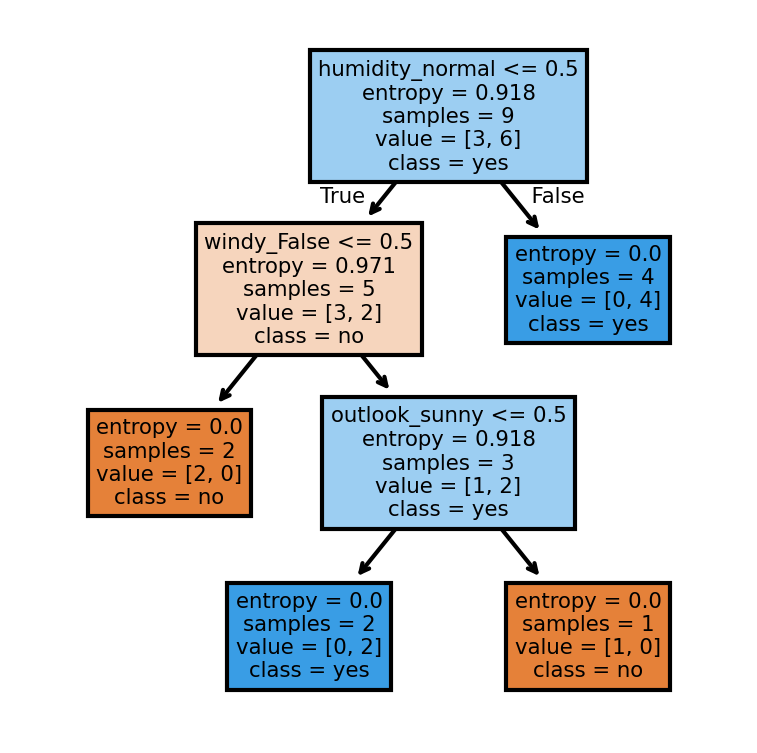

In [ ]:
# Visulaize tree
fig, axes = plt.subplots(ncols =1, nrows=1, figsize= (3,3), dpi=300)
tree.plot_tree(clf, feature_names=ohe_df.columns, class_names=np.unique(y).astype('str'), filled=True)
plt.show()